#  Data Import & Clean Up

In [2]:
import pandas as pd
import numpy as np
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.plotly as py
import plotly

In [3]:
plotly.tools.set_credentials_file(username='JLanzi556', api_key='h4SDpWQQ4j3P7aqk49uk')

In [4]:
init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline

In [5]:
#Import Data
data1 = pd.read_csv('76HZ-0degrees.csv')

on_off = list(data1['On/Off'])
timestamp = list(data1['Timestamp'])
pixel_number = list(data1['PixelNumber'])

In [6]:
# Normalizes timestamp
first_time=timestamp[0]
for x in range(len(timestamp)):
    timestamp[x]=timestamp[x]-first_time
    
# Normalizes timestamp in dataframe1
data1['Timestamp'] = timestamp

In [7]:
'''#Calculates coordinate location
polarity_number = []
for x in range(len(timestamp)):
    polarity_number.append((y_axis[x]*128)+x_axis[x])
    
#Adds new coloumn into dataframe
data1['Polarity']=polarity_number'''

"#Calculates coordinate location\npolarity_number = []\nfor x in range(len(timestamp)):\n    polarity_number.append((y_axis[x]*128)+x_axis[x])\n    \n#Adds new coloumn into dataframe\ndata1['Polarity']=polarity_number"

In [8]:
data2 = data1.copy()
data3 = data1.copy()

In [9]:
#Separates Positive Polarity
data2.drop(data2.loc[data2['On/Off']==-1].index, inplace=True)

#Separates Negative Polarity
data3.drop(data3.loc[data3['On/Off']==1].index, inplace=True)

# Graphs

In [ ]:
data1[:micro].iplot(kind='scatter',
                  x='Timestamp',
                  y='PixelNumber', 
                  xTitle='Timestamp', 
                  yTitle='Pixel Number',
                  title='Scatter Plot of 5/7 Wheel - Positive & Netagive Polarity',
                  color='purple',
                  mode='lines') #lines or markers

In [ ]:
data2[:micro].iplot(kind='scatter',
                  x='Timestamp',
                  y='PixelNumber', 
                  xTitle='Timestamp', 
                  yTitle='Pixel Number',
                  title='Scatter Plot of 5/7 Wheel - Positive Polarity',
                  color='green',
                  mode='markers')

In [ ]:
data3[:micro].iplot(kind='scatter',
                  x='Timestamp',
                  y='PixelNumber', 
                  xTitle='Timestamp', 
                  yTitle='Pixel Number',
                  title='Scatter Plot of 5/7 Wheel - Negative Polarity',
                  color='red',
                  mode='markers')

In [ ]:
data1[:micro].iplot(kind='bar',
                  x='Timestamp',
                  y='On/Off',
                  xTitle='Timestamp', 
                  yTitle='Event (On/Off)',
                  title='Bar Plot of 5/7 Wheel - Positive & Negative Polarity',
                  color='blue')

In [ ]:
micro = 2000
plot1 = cf.Scatter(
        x = data2['Timestamp'][:micro],
        y = data2['PixelNumber'][:micro],
        mode = 'markers',
        name = 'Positve Polarity',
        marker = dict(
            size = 6,
            color = 'green')
        )
    
plot2 = cf.Scatter(
        x = data3['Timestamp'][:micro],
        y = data3['PixelNumber'][:micro],
        mode = 'markers',
        name = 'Negative Polarity',
        marker = dict(
            size = 6,
            color = 'red')
        )

data = [plot1, plot2]

layout = dict(title = 'Scatter Plot of 2 Block Wheel',
              hovermode= 'closest',
              xaxis=dict(title= 'Timestamp (μS)',ticklen= 5,gridwidth= 2,),
              yaxis=dict(title= 'Pixel Number',ticklen= 5,gridwidth= 2,)
             )

fig = dict(data=data, layout=layout)

In [ ]:
py.iplot(fig)

## Data for Model

In [10]:
data1.head()

,On/Off,PixelNumber,Timestamp
0,-1,3292,0
1,1,12652,0
2,1,14504,1
3,-1,12271,2
4,1,12780,2


In [11]:
import seaborn as sns

C:\Users\joela\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\joela\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\joela\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\joela\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning:

invalid value encountered in reduce



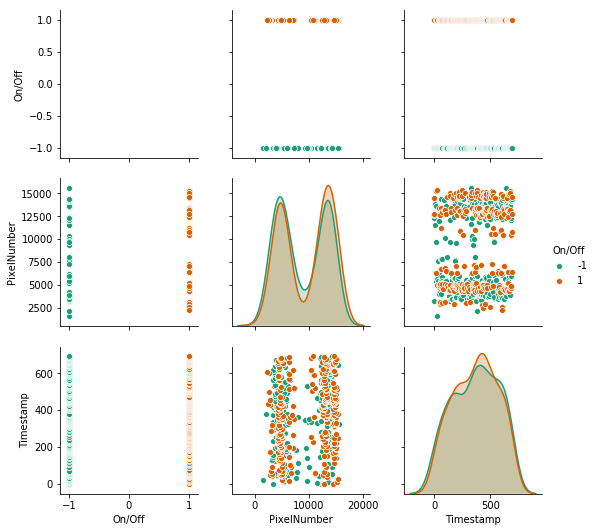

In [12]:
sns.pairplot(data1[:500],hue='On/Off',palette='Dark2')

## Training Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
t = 30000
X = data1[:t].drop('On/Off',axis=1)
y = data1[:t]['On/Off']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Training Decision Trees

We'll start just by training a single decision tree.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
# Prediction and Evaluation
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
print(confusion_matrix(y_test,predictions))

## Training K Nearest Neighbors

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
knn = KNeighborsClassifier(n_neighbors=1)

In [89]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [90]:
pred = knn.predict(X_test)

In [91]:
# Prediction and Evaluation
from sklearn.metrics import classification_report,confusion_matrix

In [92]:
print(confusion_matrix(y_test,pred))

[[3634  163]
 [ 126 3577]]


In [93]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.96      3797
           1       0.96      0.97      0.96      3703

   micro avg       0.96      0.96      0.96      7500
   macro avg       0.96      0.96      0.96      7500
weighted avg       0.96      0.96      0.96      7500



In [99]:
# Choosing K
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

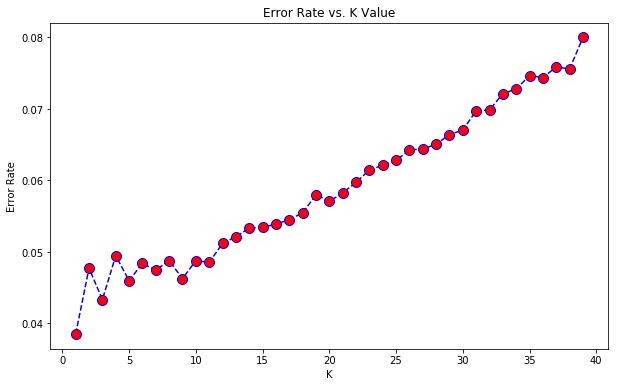

In [101]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [59]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1 then K=x
x=1
knn = KNeighborsClassifier(n_neighbors=x)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(f'WITH K={x}') # replace with x
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[1444   67]
 [  52 1437]]


              precision    recall  f1-score   support

          -1       0.97      0.96      0.96      1511
           1       0.96      0.97      0.96      1489

   micro avg       0.96      0.96      0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000



## Suport Vector Machine

In [60]:
from sklearn.svm import SVC

In [102]:
svc_model = SVC()

In [103]:
svc_model.fit(X_train,y_train)

C:\Users\joela\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [104]:
# Model Evaluation
predictions = svc_model.predict(X_test)

In [105]:
from sklearn.metrics import classification_report,confusion_matrix

In [106]:
print(confusion_matrix(y_test,predictions))

[[3797    0]
 [3598  105]]


In [107]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.51      1.00      0.68      3797
           1       1.00      0.03      0.06      3703

   micro avg       0.52      0.52      0.52      7500
   macro avg       0.76      0.51      0.37      7500
weighted avg       0.75      0.52      0.37      7500



In [108]:
# GridSearch
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [109]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

C:\Users\joela\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=  11.3s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.3s remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total=  11.2s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=  11.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   9.7s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=  10.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=  11.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=  10.7s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=  10.4s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 20.8min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [110]:
grid.best_params_

{'C': 10, 'gamma': 0.001}

In [111]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [112]:
grid_predictions = grid.predict(X_test)

In [113]:
print(confusion_matrix(y_test,grid_predictions))

[[2586 1211]
 [  34 3669]]


In [114]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

          -1       0.99      0.68      0.81      3797
           1       0.75      0.99      0.85      3703

   micro avg       0.83      0.83      0.83      7500
   macro avg       0.87      0.84      0.83      7500
weighted avg       0.87      0.83      0.83      7500



## K Means Clustering

Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into.

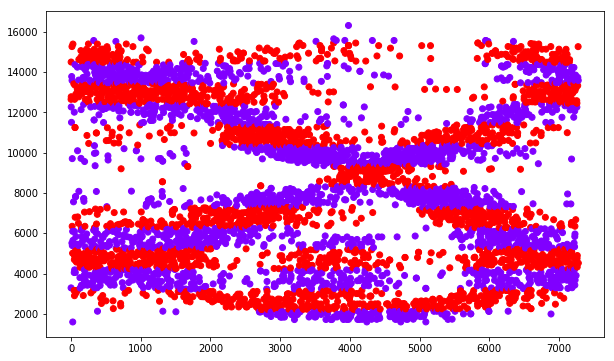

In [16]:
import matplotlib.pyplot as plt
x = 5000
plt.figure(figsize=(10,6))
plt.scatter(data1[:x]['Timestamp'],
            data1[:x]['PixelNumber'],
            c=data1[:x]['On/Off'],
            cmap='rainbow'
)

In [17]:
from sklearn.cluster import KMeans

In [18]:
kmeans = KMeans(n_clusters=2)

In [19]:
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
kmeans.cluster_centers_

array([[ 8119.87522552, 32724.06362169],
       [ 8169.68115388, 10889.20288471]])

In [21]:
kmeans.labels_

array([1, 0, 0, ..., 1, 0, 1])

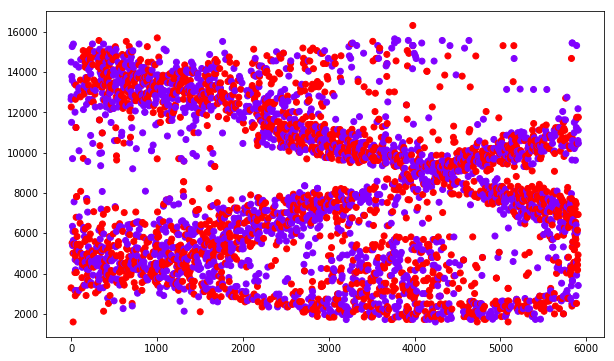

In [22]:
x = 4000
plt.figure(figsize=(10,6),)
plt.scatter(data1[:x]['Timestamp'],
            data1[:x]['PixelNumber'],
            c=kmeans.labels_[:x],
            cmap='rainbow',
)

In [67]:
??

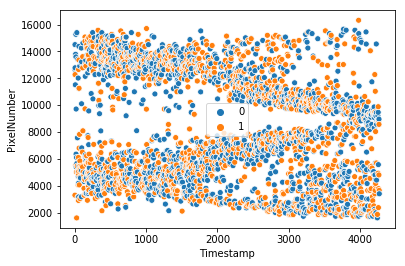

In [26]:
sns.scatterplot(x = 'Timestamp',
                y = 'PixelNumber',
                data = data1[:3000],
                hue=kmeans.labels_[:3000])

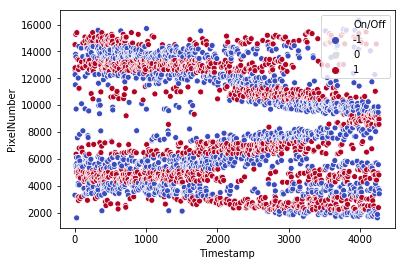

In [30]:
sns.scatterplot(x = 'Timestamp',
                y = 'PixelNumber',
                data = data1[:3000],
                hue='On/Off',
                palette='coolwarm')

K Means Clustering results were unhelpful

.